<a href="https://colab.research.google.com/github/pa-shk/iad-intro-ds-practical-tasks/blob/main/hw05_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(np.linalg.norm(X @ w - y)) / X.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * X.T @ (X @ w - y) / X.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]


In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_list = [w_init]
    for _ in range(n_iterations):
        w_init = w_init - lr * loss.calc_grad(X, y, w_init)
        w_list.append(w_init)
    return w_list

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649494


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

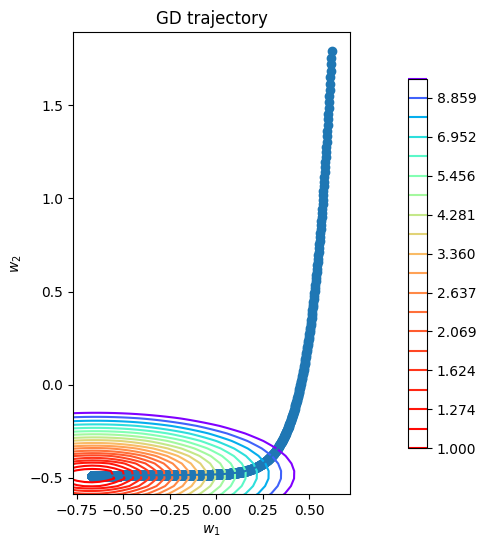

In [ ]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.0001), X, y, loss)

При маленьком значении `lr` (0.0001) градиентный спуск делает очень маленькие и точные шаги, его траектория полностью соответствует направлению к минимуму функции потерь

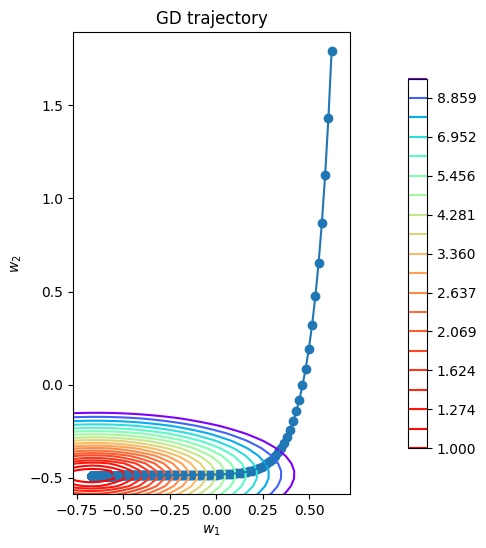

In [ ]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.001), X, y, loss)

С увеличением значения `lr` (0.001) градиентный спуск делает более большие шаги (это заметно в первых итерациях), однако траектория все еще соответствует направлению к минимуму функции потерь

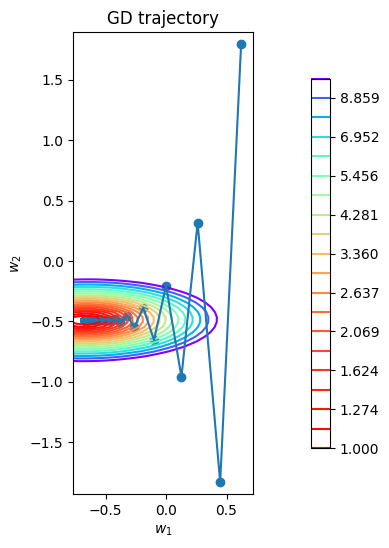

In [ ]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.01), X, y, loss)

При еще большем `lr` градиентный спуск делает шаги еще больше, на первых итерациях он довольно сильно "шатается", однако с уменьшением градиента траектория становится более плавной и в результате градиентный спуск благополучно находит минимум.

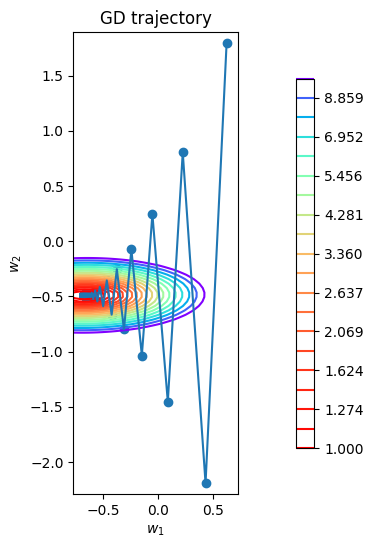

In [ ]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.011), X, y, loss)

При `lr` = 0.011 градиентный спуск начинает сильно колебаться на первых итерациях, хотя в самом конце его траектория стабилизируется и он все-таки доходит до минимума (не перескакивает его).

<ipython-input-3-7f67bf05507a>:20: RuntimeWarning: overflow encountered in matmul
  return 2 * X.T @ (X @ w - y) / X.shape[0]
<ipython-input-3-7f67bf05507a>:20: RuntimeWarning: invalid value encountered in matmul
  return 2 * X.T @ (X @ w - y) / X.shape[0]
<ipython-input-6-3abcb07477e6>:21: RuntimeWarning: invalid value encountered in subtract
  w_init = w_init - lr * loss.calc_grad(X, y, w_init)


ValueError: ignored

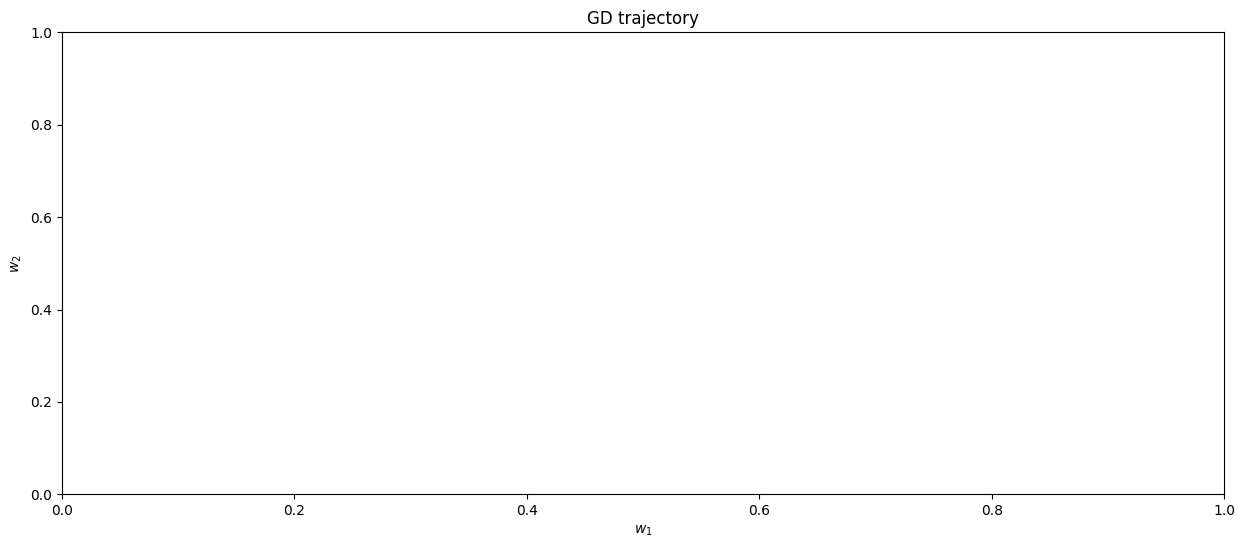

In [ ]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.1), X, y, loss)

In [ ]:
gradient_descent(w_init, X, y, loss, 0.1, n_iterations=20)

[array([0.62074297, 1.79288146]),
 array([ -1.11311179, -34.43993616]),
 array([ -4.15261248, 506.48905087]),
 array([   56.83402916, -7572.35131539]),
 array([  -862.42274074, 113087.82500625]),
 array([   12871.51737334, -1689013.08750717]),
 array([ -192252.008114  , 25225979.56215029]),
 array([ 2.87133922e+06, -3.76758629e+08]),
 array([-4.28844429e+07,  5.62701880e+09]),
 array([ 6.40493793e+08, -8.40414479e+10]),
 array([-9.56599358e+09,  1.25518773e+12]),
 array([ 1.42871382e+11, -1.87466575e+13]),
 array([-2.13383288e+12,  2.79987733e+14]),
 array([ 3.18695230e+13, -4.18171242e+15]),
 array([-4.75982211e+14,  6.24553034e+16]),
 array([ 7.10895690e+15, -9.32791288e+17]),
 array([-1.06174700e+17,  1.39315565e+19]),
 array([ 1.58575540e+18, -2.08072555e+20]),
 array([-2.36837986e+19,  3.10763468e+21]),
 array([ 3.53725622e+20, -4.64135854e+22]),
 array([-5.28301298e+21,  6.93202751e+23])]

При `lr` = 0.1 мы получаем ошибку `RuntimeWarning: overflow encountered in matmul`, если посмотреть хотя бы на первые 20 итераций градиентного спуска, станет очевидно, что градиентый спуск при таком `lr` расходится и довольно быстро получаются настолько большие числа для весов, что numpy отказывается с ними работать.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_list = [w_init]
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        w_init = w_init - lr * loss.calc_grad(X_batch, y_batch, w_init)
        w_list.append(w_init)
    return w_list

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

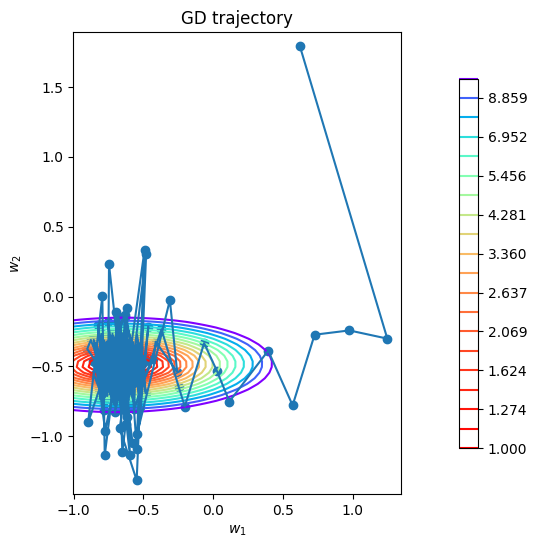

In [ ]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 5), X, y, loss)

При `lr` = 0.01 и `batch_size` = 5 стохастический градиентный спуск не достигает минимума, а "бродит" где-то рядом с ним. Но хотелось бы чтобы он подобрался к минимуму поближе и там и остался.

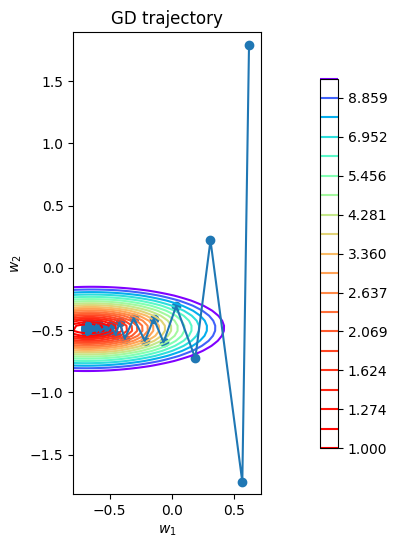

In [ ]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 100), X, y, loss)

Если увеличить `batch_size` до 100, то есть делать стохастический градиентный спуск по трети объектов выборки, его траектория почти не будет отличаться от траектории обычного градиентного спуска.

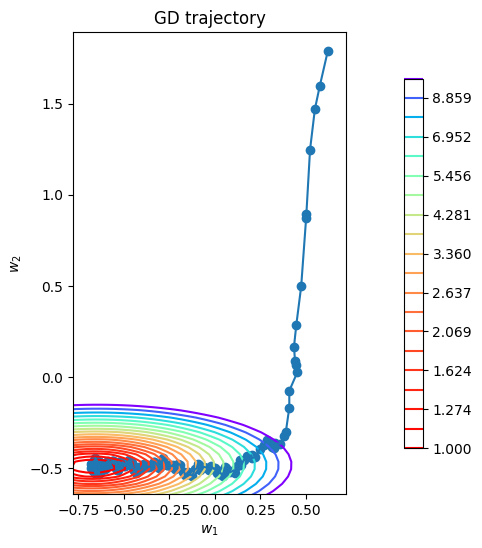

In [ ]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.001, 5), X, y, loss)

Уменьшения длины шага еще один способ лучше достигать минимума при стохастическом градиентом спуске с небольшим `batch_size`

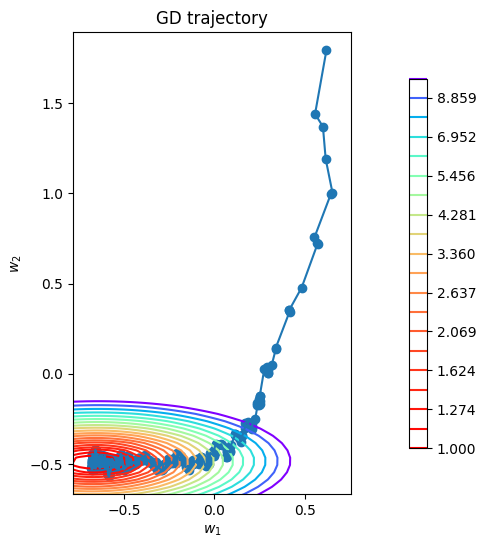

In [ ]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.0005, 1), X, y, loss)

Если взять очень маленький `lr`, то даже настоящий стохастический градиентный спуск (т.е. градиентый спуск по 1 объекту, а не по нескольким, mini-batch gradient descent как это было в примерах выше) может прийти в окрестность минимума.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    s_0 = 1
    w_list = [w_init]
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        step = lr * (s_0 / (s_0 + t)) ** p
        w_init = w_init - step * loss.calc_grad(X_batch, y_batch, w_init)
        w_list.append(w_init)
    return w_list

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

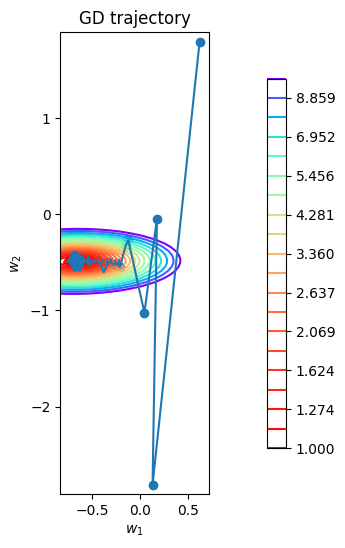

In [ ]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.1), X, y, loss)

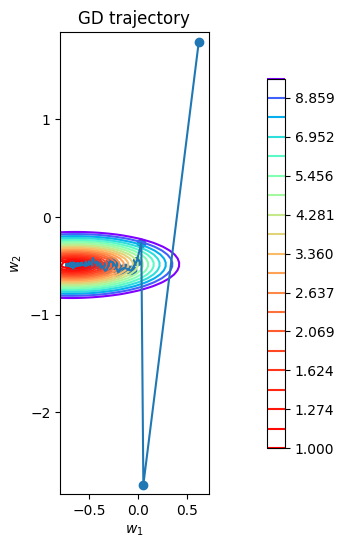

In [ ]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.4), X, y, loss)

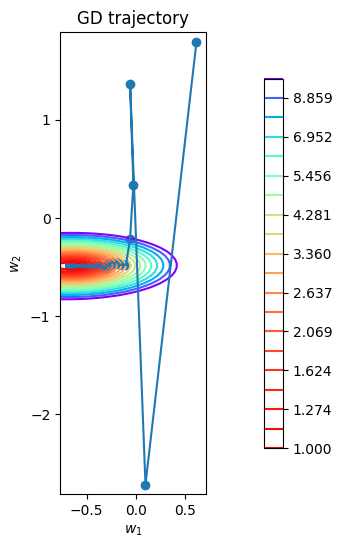

In [ ]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.6), X, y, loss)

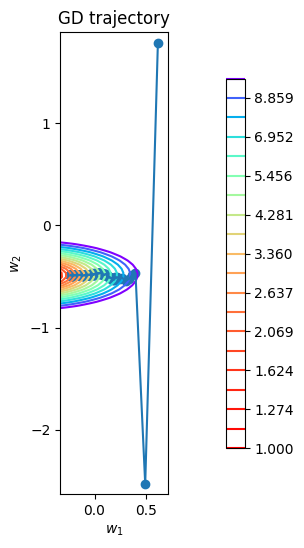

In [ ]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 1), X, y, loss)

**Вывод.** Параметр `p` определяет скорость затухания шага градиентного спуска. При маленьком значении `p` градиентный спуск даже на последних итерациях делает довольно большие шаги. Например, при `p` = 0.01 градиентный спуск приближается к окрестности минимума, но продолжает вести себя неустойчиво. С увеличением `p` скорость уменьшения шага градиентного спуска увеличивается, для данного случая значения параметра `p` 0.4 - 0.6 кажутся оптимальными. При данных значениях градиентный спуск заметно "шатается" в начале, но аккуратно подходит к минимуму в конце. При больших значения (`p` = 1), есть риск, что длина шага будет снижатся слишком быстро и градиентный спуск не успеет дойти до минимума за данное кол-во итераций

Чтобы лучше понять, как длина шага зависит от параметра `p` можно нарисовать соответствующий график

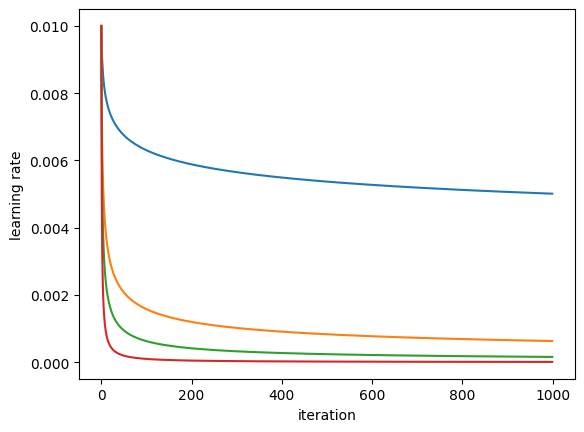

In [ ]:
def get_stochastic_gradient_descent_lr(p: float, lr: float = 0.01, n_iterations: int = 1000) -> List:
    s_0 = 1
    steps = []
    for t in range(n_iterations):
        step = lr * (s_0 / (s_0 + t)) ** p
        steps.append(step)
    return steps


fig, ax = plt.subplots()

for i, p in enumerate([0.1, 0.4, 0.6, 1]):
  ax.plot(get_stochastic_gradient_descent_lr(p), label=p)

ax.set_xlabel('iteration')
ax.set_ylabel('learning rate')

plt.show()

ax.legend()
plt.show()

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

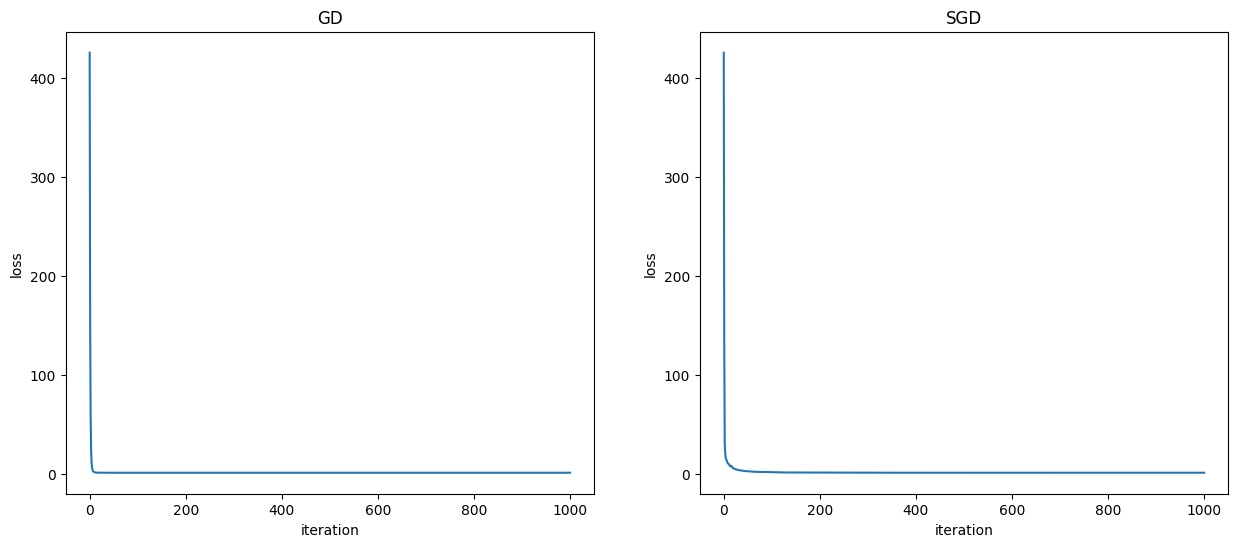

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(
    [loss.calc_loss(X, y, w) for w in gradient_descent(w_init, X, y, loss, 0.01, 1000)],
     label=2
     )

ax1.set_title('GD')


ax2.plot(
    [loss.calc_loss(X, y, w) for w in stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.6)],
    label=1
    )

ax2.set_title('SGD')

for ax in (ax1, ax2):
  ax.set_xlabel('iteration')
  ax.set_ylabel('loss')


plt.show()

Графики лосса для обычного градиентного спуска и стохастического градиентного спуска получились почти идентичными (у полного градиентного спуска уголок чуть более острый, так как полный градиентный спуск дает значение лосса близкое к нулю почти сразу же). Это показывает преимущество стохастического градиентного спуска. Стохастический градиентный спуск при правильном подборе гиперпараметров показывает такие же результаты, как и обычный градиентный спуск, однако является более эффективным, так как на каждой итерации осуществляется только по небольшой части выборки

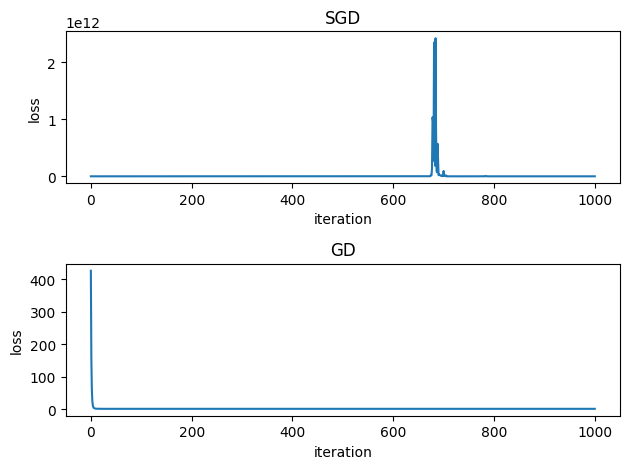

In [ ]:
fig, ax = plt.subplots(2)

ax[0].plot(
    [loss.calc_loss(X, y, w) for w in stochastic_gradient_descent(w_init, X, y, loss, 0.01, 1, 0.01)],
    label=1
    )

ax[0].set_title('SGD')


ax[1].plot(
    [loss.calc_loss(X, y, w) for w in gradient_descent(w_init, X, y, loss, 0.01, 1000)],
     label=2
     )

ax[1].set_title('GD')
for i in (0, 1):
  ax[i].set_xlabel('iteration')
  ax[i].set_ylabel('loss')


fig.tight_layout()

plt.show()

С другой стороны, подбор гиперпараметров для стохастического градиентного спуска еще более важен. В данном примере стохастический градиентный спуск осуществлялся по одному объекту выборки и со слишком маленьким параметром `p`, поэтому даже после достаточно большего количества итераций был возможен сильный скачок лосса

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.rand(X.shape[1])
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X @ self.w

    def set_params(self, **params) -> None:
        # Позволяет изменять атрибуты класса (для совместимости с sklearn GridSearchCV)
        self.loss = params.get('loss')
        self.lr = params.get('lr', 0.1)

    def get_params(self, deep=True) -> dict:
        # Поозволяет получать атрибуты классa (для совместимости с sklearn GridSearchCV)
        return {'loss': self.loss,
                'lr': self.lr}

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
X_raw

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [ ]:
X_raw.index.nunique()

201

Кажется, колонка индекс не несет дополнительной информации, кроме номера наблюдения

In [ ]:
X_raw.drop(columns=['index'], inplace=True)

In [ ]:
X_raw.isna().sum()

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

Так как пропушенных значений в каждой колонке не очень много, можно их заполнить. Стратегия заполнения будет зависить от типа признака

In [ ]:
num_cols = X_raw.select_dtypes(exclude='object').columns
cat_cols = X_raw.select_dtypes(include='object').columns

In [ ]:
X_raw.loc[:, cat_cols].nunique()

2     22
3      2
4      2
5      2
6      5
7      3
8      2
14     6
15     7
17     8
dtype: int64

Количество категорий в каждой колонке с категориальными признаками не очень большое, поэтому можно применить one-hot encoding

Разделим данные на тренировочные и тестовые

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)

Создадим пайплайн для предобработки данных, объединяющий обработку категориальных и числовых признаков

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
],
    n_jobs=-1)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
regression_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', linear_regression)
])

In [ ]:
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index([0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index([2, 3, 4, 5, 6, 7, 8, 14, 15, 17], dtype='object'))])),
                ('model',
                 <__main__.LinearRegression object at 0x7fa8a921eac0>)])

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, regression_pipeline.predict(X_train))

1542846.8215367238

In [ ]:
mean_squared_error(y_test, regression_pipeline.predict(X_test))

10300726.600333987

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return (np.square(np.linalg.norm(X @ w - y)) / X.shape[0]
                + self.coef * np.square(np.linalg.norm(w[:-1])))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 * X.T @ (X @ w - y) / X.shape[0]
                + 2 * self.coef * np.append(w[:-1], 0))

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
from sklearn.model_selection import GridSearchCV

Будем использовать уже готовый пайплайн, изменим только функцию потерь. Наилучший коэффициент регуляризации найдем по кросс-валидации

In [ ]:
grid_params = {'model__loss' : [MSEL2Loss(coef) for coef
                                in [0.00001, 0.0001, 0.001, 0.01, 0.1]]}

ridge_cv = GridSearchCV(regression_pipeline,
                        grid_params,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        refit=True,
                        n_jobs=-1)

ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         Index([0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24], dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent...
                                                                         Index([2, 3, 4, 5, 6, 7, 8, 14, 15, 17], dtype='object'))])),
                                       ('model',
                                        <__main__.LinearRegression object at 0x7fa8a921eac0>)]),
             n_jobs=-1,
             param_grid={'model__loss': [<__main__.MSEL2Loss object at 0x7fa882c810a0>,
                                         <__main__.MSEL2Loss object at 0x7fa882c81b80>,
                                         <__main__.MSEL2Loss object at 0x7fa882c81be0>,
                                         <__main__.MSEL2Loss object at 0x7fa882c81c40>,
                                         <__main__.MSEL2Loss object at 0x7fa882c81070>]},
             scoring='neg_mean_squared_error')

Посмотрим, как лосс на валидации зависит от коэффициента регуляризации

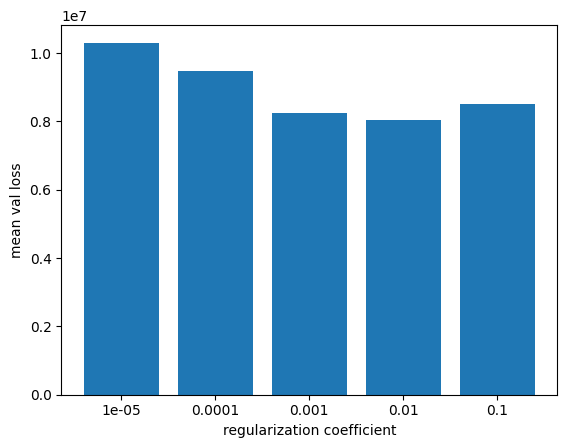

In [ ]:
fig, ax = plt.subplots()

df = pd.DataFrame(ridge_cv.cv_results_)

ax.bar([str(i.coef) for i in df.param_model__loss] , np.abs(df.mean_test_score))

ax.set_xlabel('regularization coefficient')
ax.set_ylabel('mean val loss')

plt.show()

In [ ]:
ridge_cv.best_params_['model__loss'].coef

0.01

In [ ]:
mean_squared_error(y_test, ridge_cv.predict(X_test))

7557944.097181294

In [ ]:
mean_squared_error(y_train, ridge_cv.predict(X_train))

2751496.848388523

При использовании регресии с регуляризацией ошибка на тестовых данных уменьшилась, а на тренировочных возросла

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        vf = np.vectorize(self._calc_loss_f)
        return vf(X @ w - y).sum() / X.shape[0]

    def _calc_loss_f(self, z) -> float:
        """
        Функция для вычислений значения лосса на каждом объекте
        """
        if np.abc(z) < self.eps:
          return np.square(z) / 2
        return self.eps * (np.abs(z) - self.eps / 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        vf = np.vectorize(self._calc_grad_f)
        return  X.T @ vf(X @ w - y) /  X.shape[0]


    def _calc_grad_f(self, z) -> float:
        """
        Функция для вычислений градиента лосса по каждому объекту
        """
        if np.abs(z) < self.eps:
          return z
        return self.eps * np.sign(z)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
grid_params = {'model__loss' : [HuberLoss(eps) for eps in [1, 10, 100, 500, 5000, 100000]]}

huber_cv = GridSearchCV(regression_pipeline,
                        grid_params,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        refit=True,
                        n_jobs=-1)

huber_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         Index([0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24], dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent...
                                        <__main__.LinearRegression object at 0x7fa8a921eac0>)]),
             n_jobs=-1,
             param_grid={'model__loss': [<__main__.HuberLoss object at 0x7fa882360310>,
                                         <__main__.HuberLoss object at 0x7fa882360f70>,
                                         <__main__.HuberLoss object at 0x7fa882360370>,
                                         <__main__.HuberLoss object at 0x7fa882360ca0>,
                                         <__main__.HuberLoss object at 0x7fa882360e20>,
                                         <__main__.HuberLoss object at 0x7fa882360e50>]},
             scoring='neg_mean_squared_error')

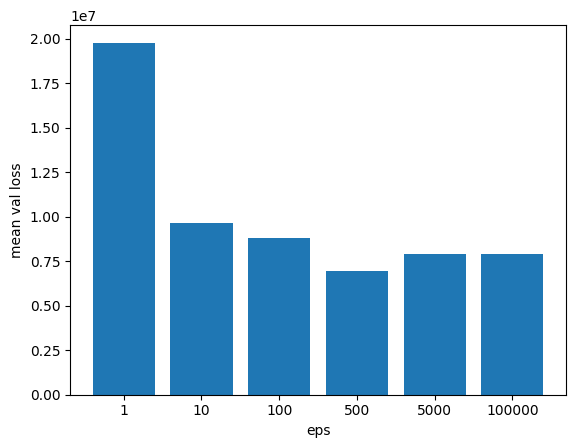

In [ ]:
fig, ax = plt.subplots()

df = pd.DataFrame(huber_cv.cv_results_)

ax.bar([str(i.eps) for i in df.param_model__loss] , np.abs(df.mean_test_score))

ax.set_xlabel('eps')
ax.set_ylabel('mean val loss')

plt.show()

Проведем более точный подбор эпсилон

In [ ]:
grid_params = {'model__loss' : [HuberLoss(eps) for eps in [200, 500, 1000, 2000, 4000]]}

huber_cv = GridSearchCV(regression_pipeline,
                        grid_params,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        refit=True,
                        n_jobs=-1)

huber_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         Index([0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24], dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent...
                                                                         Index([2, 3, 4, 5, 6, 7, 8, 14, 15, 17], dtype='object'))])),
                                       ('model',
                                        <__main__.LinearRegression object at 0x7fa8a921eac0>)]),
             n_jobs=-1,
             param_grid={'model__loss': [<__main__.HuberLoss object at 0x7fa8a91c0460>,
                                         <__main__.HuberLoss object at 0x7fa8a91c04c0>,
                                         <__main__.HuberLoss object at 0x7fa8a95205b0>,
                                         <__main__.HuberLoss object at 0x7fa88242ab80>,
                                         <__main__.HuberLoss object at 0x7fa88242a910>]},
             scoring='neg_mean_squared_error')

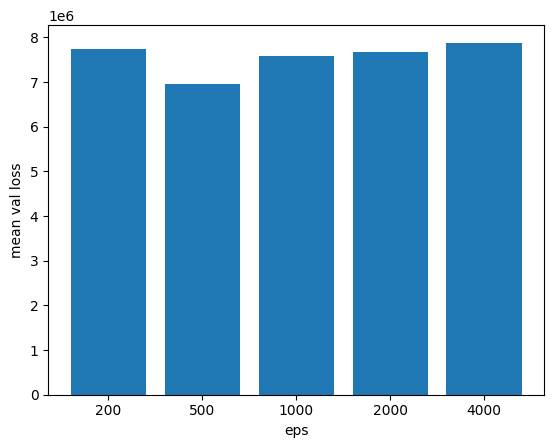

In [ ]:
fig, ax = plt.subplots()

df = pd.DataFrame(huber_cv.cv_results_)

ax.bar([str(i.eps) for i in df.param_model__loss] , np.abs(df.mean_test_score))

ax.set_xlabel('eps')
ax.set_ylabel('mean val loss')

plt.show()

In [ ]:
huber_cv.best_params_['model__loss'].eps

500

In [ ]:
mean_squared_error(y_test, huber_cv.predict(X_test))

7896005.630732678

In [ ]:
mean_squared_error(y_train, huber_cv.predict(X_train))

2236175.927514233

Значение ошибки на тесте у регресии с Huber loss чуть выше чем у Ridge регрессии. На тренировочных данных, наоборот, ошибка больше у Ridge регрессии. Таким образом, можно сделать вывод, что в данном случае Ridge регрессия переобучается меньше всех остальных моделей

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

Когда проверка дз немного задерживается...

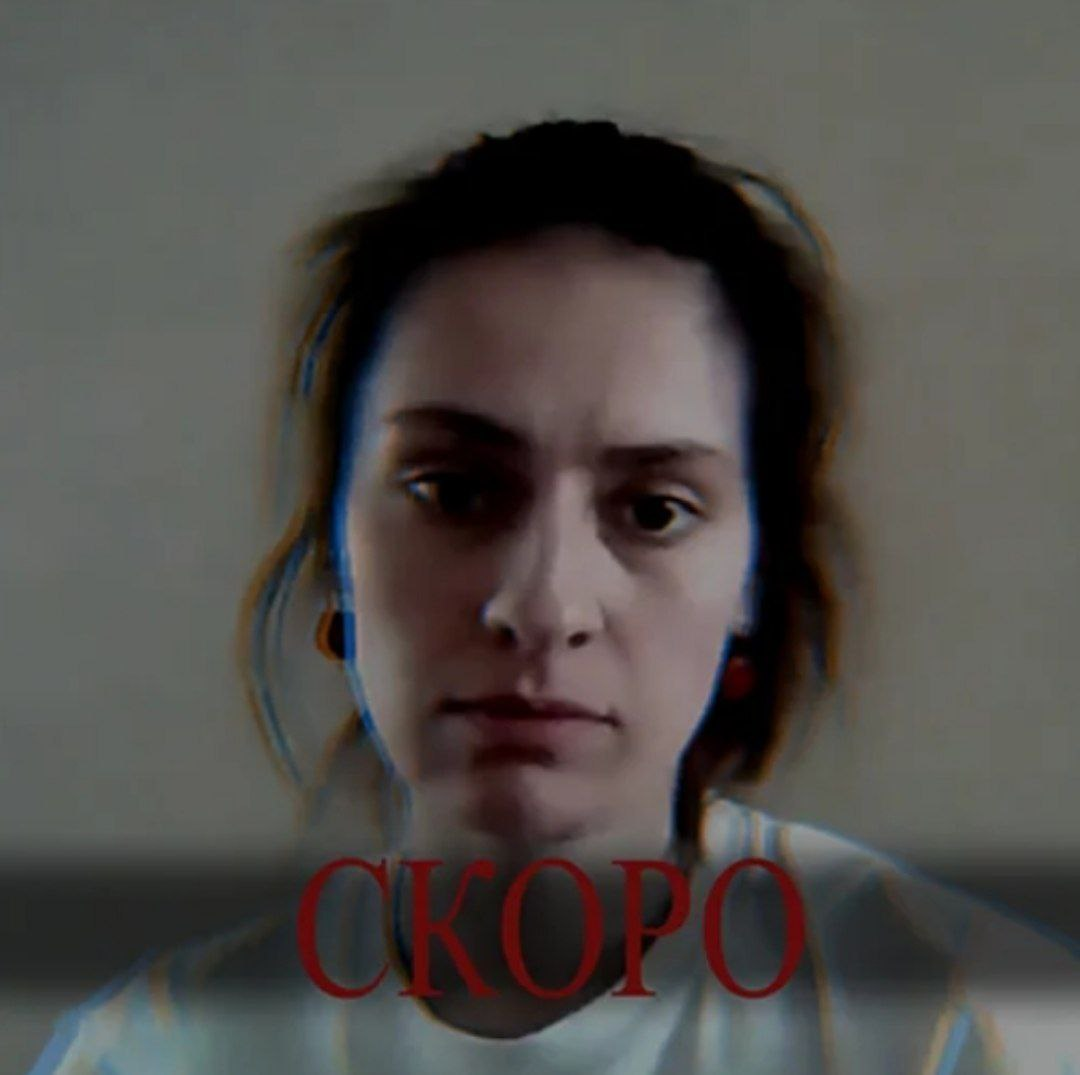

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

Примечание. При выполнении задания были использованы материалы данного туториала: [Решение оптимизационных задач неградиентными методами | Вебинар Игоря Котенкова | karpov.courses](https://www.youtube.com/live/EXyxNE47Gz4?feature=share)

Сначала рассмотрим несколько функций для рассчета температуры на каждом шаге. Самое главное, чтобы температура была убывающей к нулю положительной последовательностью.

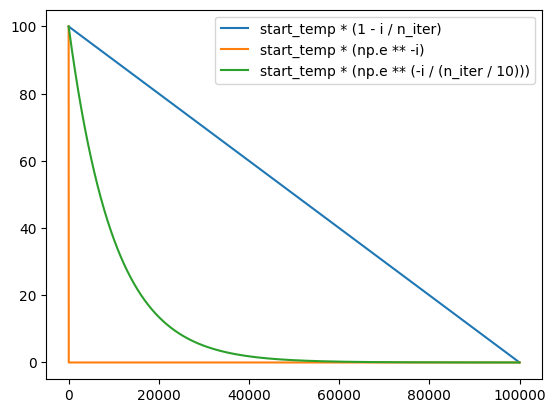

In [ ]:
fig, ax = plt.subplots()

temp_list_lin, temp_list_e, temp_list_e_10 = [], [], []
n_iter = 100_000
start_temp = 100

for i in range(n_iter):
    temp = start_temp * (1 - i / n_iter)
    temp_list_lin.append(temp)

for i in range(n_iter):
    temp = start_temp * (np.e ** -i)
    temp_list_e.append(temp)

for i in range(n_iter):
    temp = start_temp * (np.e ** (-i / (n_iter / 10)))
    temp_list_e_10.append(temp)

ax.plot(temp_list_lin, label='start_temp * (1 - i / n_iter)')
ax.plot(temp_list_e, label='start_temp * (np.e ** -i)')
ax.plot(temp_list_e_10, label='start_temp * (np.e ** (-i / (n_iter / 10)))')

plt.legend()

plt.show()

Простая линейная экстраполяция по двум точкам - стартовой температуре на первой итерации и нулю на последней итерации кажется не самым лучшим решением, так как хочется, чтобы в конце динамичность системы снижалась более быстрыми темпами. Можно взять экспоненту от отрицательного значения номера итерации, но при использовании данной функции температура почти сразу падает до нуля. Компромиссом является нормализация номера итерации на константу, зависящую от общего количества итераций

In [ ]:
def optimize_with_anneling(
    X: np.ndarray,
    y: np.ndarray,
    n_iter: int = 100_000,
    start_temp: int = 100,
    p: int = 3) -> List[np.ndarray]:

  weights = []
  w_old = np.random.uniform(-2, 2, (X.shape[1]))
  old_loss = loss.calc_loss(X, y, w_old)
  for i in range(n_iter):
    weights.append(w_old)
    w_new = w_old + np.random.standard_t(p, size=w_old.shape)
    new_loss = loss.calc_loss(X, y, w_new)
    if new_loss > old_loss:
      diff = new_loss - old_loss
      temp = temp = start_temp * (np.e ** (-i / (n_iter / 10)))
      prob = np.e ** (-diff / temp)
      if prob < np.random.random():
        continue
    w_old = w_new
    old_loss = new_loss

  return weights

Заново сгенирируем синтетический датасет, так как в процессе выполнения блокнота у было присвоено другое значение

In [ ]:
w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))

Построим траекторию метода имитации отжига (подписи на графике не верить)

In [ ]:
an_weights = optimize_with_anneling(X, y)

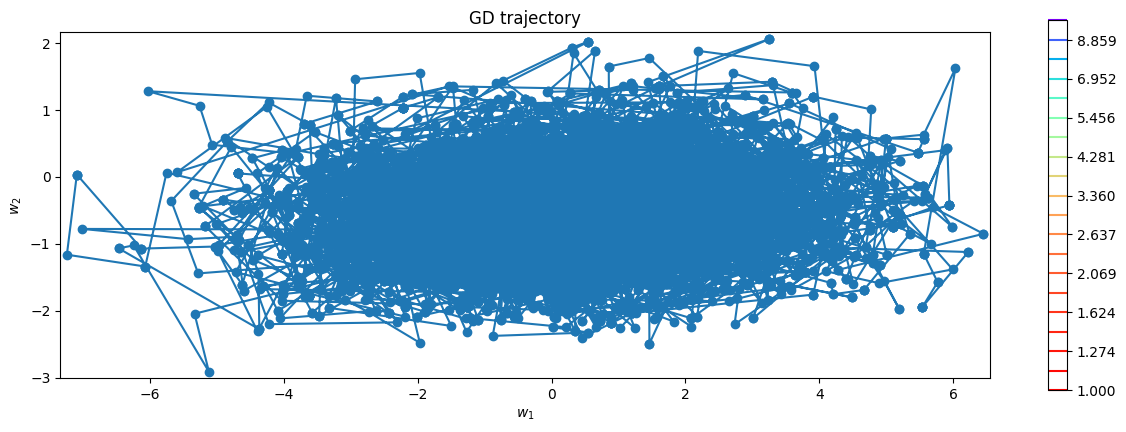

In [ ]:
plot_gd(an_weights, X, y, loss)

Траектория данного метода крайне случайна, чтобы попытаться увидеть хотя бы какие-нибудь закономерности, рассмотрим последние 20000 итерации (подписи на графики все еще не верить)

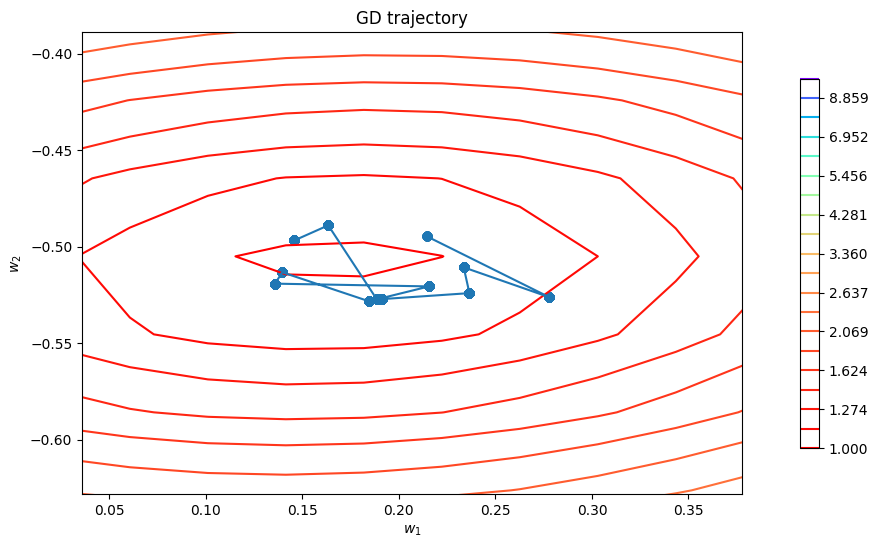

In [ ]:
plot_gd(an_weights[-20000:], X, y, loss)

Заметим, что выбор направления движения все также случаен, однако это не мешает алгоритму хорошо приблизится к минимуму

Теперь построим траекторию градиентного спуска

In [ ]:
gd_weights = gradient_descent(np.random.uniform(-2, 2, (X.shape[1])),
                              X,
                              y,
                              loss,
                              0.01)

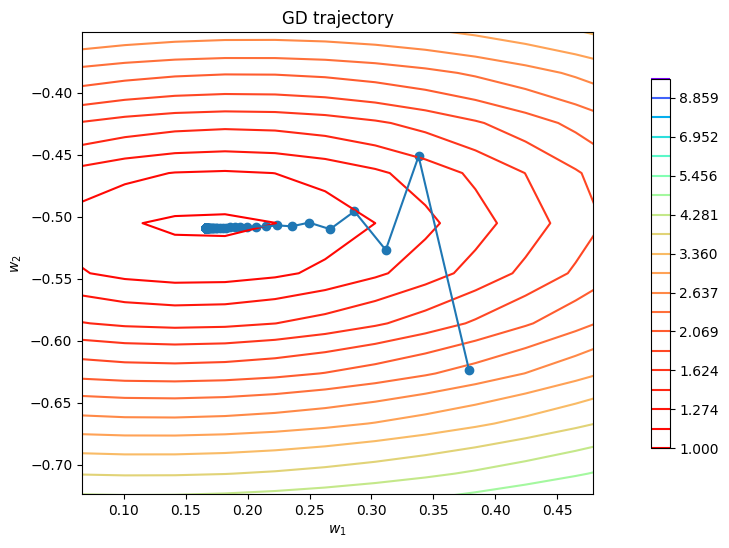

In [ ]:
plot_gd(gd_weights, X, y, loss)

Траектория градиентного спуска гораздо больше соответствует направлению к минимуму функции

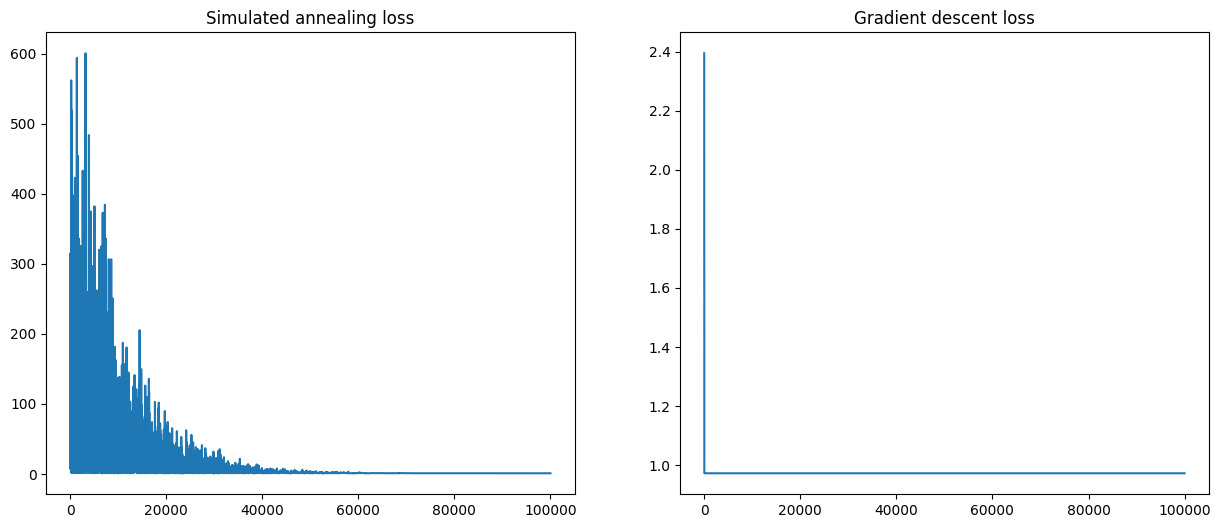

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot([loss.calc_loss(X, y, w) for w in an_weights])
ax1.set_title('Simulated annealing loss')

ax2.plot([loss.calc_loss(X, y, w) for w in gd_weights])
ax2.set_title('Gradient descent loss')

plt.show()

Значение функции потерь на начальных итерациях метода имитации отжига на порядок выше и сильно колеблется, однако в конце приближается к нулю. С градиентным спуском минимум был достигнут почти сразу, никаких колебаний не наблюдалось

In [ ]:
loss.calc_loss(X, y, an_weights[-1])

0.9882293719090339

In [ ]:
loss.calc_loss(X, y, gd_weights[-1])

0.9725607177145793

Результат, полученный с помощью градиентного спуска, оказался лучше, однако метод имитации отжига не очень сильно ему проигрывает